# CBE 562 Midterm 1

#### Tyson Wheelwright

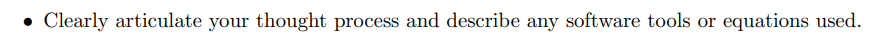

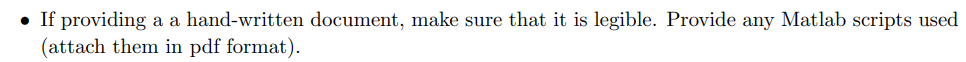

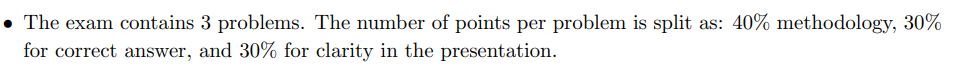

I'm importing the libraries I need in Python.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Problem 1: Pandemic

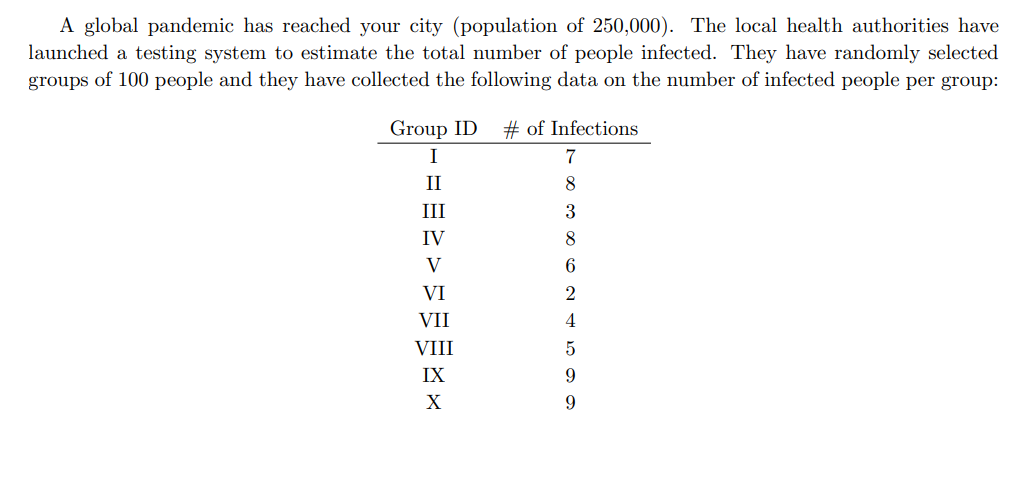

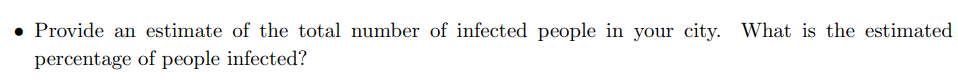

I think I could estimate the number of people infected by taking the emperical mean (which is the average of all of the measured groups).  
Then I multiply that average by the total number of people - in this case 250,000 people.   
There may be errors in sampling, but based on how the next question is asking what I would use to model the data, I'm assuming that this question doesn't require the model to answer, which is why I'm going with this naive approach.

In [6]:
infections_per_100 = [7,8,3,8,6,2,4,5,9,9]
#check if there's 10
print(f'{len(infections_per_100) = }')
#take the average
print(f'{np.mean(infections_per_100) = }')
#now we know how many infections there are per 100 people
#so we can calulate the total number of infections by dividing the total (250000) by 100 to figure out how many 100s there are
#then multiply by the average number of infections per 100
total_infections = (250000/100)*np.mean(infections_per_100)
print(f'{total_infections = }')
#proportion of infected people to total population
print(f'{total_infections/250000 = }')
#which makes sense

len(infections_per_100) = 10
np.mean(infections_per_100) = 6.1
total_infections = 15250.0
total_infections/250000 = 0.061


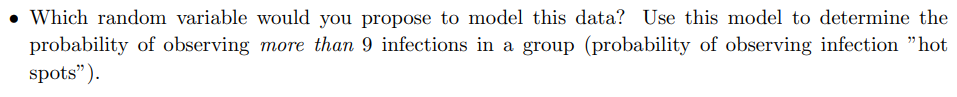

When I hear the sampling with a "Yes/No" distinction, I think of Hypergeometic RV Modeling.   
This is based on this text from the slide.   

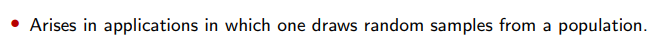

In [11]:
#make a hypergeometric model to determine the probability of observing more than 9 infection in a sample of 100
#there's a function in the scipy.stats library to do this

N = 250000 #total number
K = total_infections #our desiered group
n = 100 #sample size
hyper_rv = stats.hypergeom(N, K, n)
#now we can use the hyper_rv to calculate the probability of observing 9 or more infections

#9 or fewer infections in sample
cp_9_or_fewer = hyper_rv.cdf(9)
#more than 9 infections in sample
cp_more_than_9 = 1 - cp_9_or_fewer

print(f'{cp_more_than_9 = :.5f}')

cp_more_than_9 = 0.08433


## Problem 2: Gaussian Properties

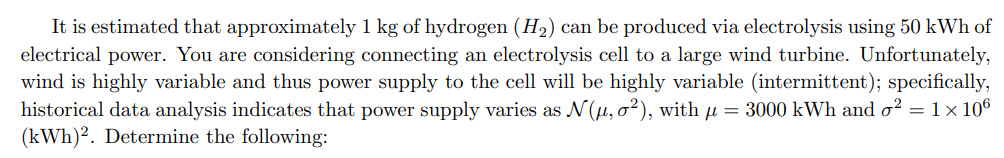

So, we're given one normal probability distribution, and we need to pipe that into an equation to get another probability distribution.   
Then we're supposed to characterize that.  

In [42]:
#define the gaussian rv of power output
mu = 3000 #kwh
sigma_sq = 1e6

#set a seed for reproducibility
np.random.seed(175)
#sample 10 000 000 times from the normal distribution
power_output = np.random.normal(mu, sigma_sq, 10000000)

#equation of 1kg of H2 produced per 50 kWh of power
h2_kg = power_output/50

#check values of the power output and h2_kg to see if they match my expectations
print('checks:')
print(f'{np.mean(power_output) = }')
print(f'{np.mean(h2_kg) = }')
print(f'{np.mean(power_output)/np.mean(h2_kg) = }') #gets clocse to 50, so it's good! 

checks:
np.mean(power_output) = 2690.0068233773463
np.mean(h2_kg) = 53.80013646754691
np.mean(power_output)/np.mean(h2_kg) = 50.000000000000014


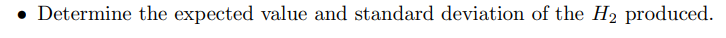

In [43]:
#now we have the distribution of H2 and can calculate the expected value and standard deviation

exp_value = np.mean(h2_kg)
std_dev = np.std(h2_kg)
print(f'\n{exp_value = }\n{std_dev = }')

#the std is huge!


exp_value = 53.80013646754691
std_dev = 20001.99882130305


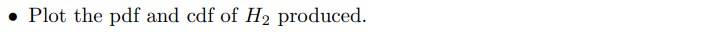

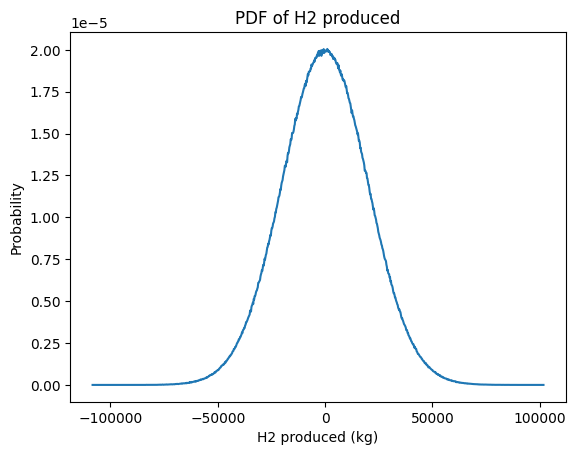

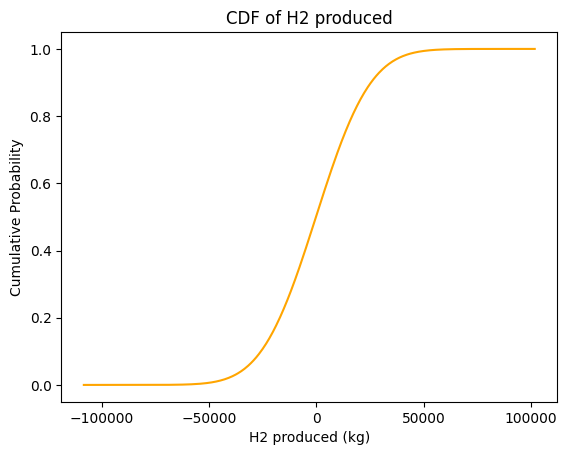

In [44]:
#now we will plot the pdf and cdf
#first we calculate the pdf
hist, bins = np.histogram(h2_kg, bins=1000, density=True)
pdf = hist/ (np.sum(hist) * np.diff(bins))

#now we calculate the cdf
cdf = np.cumsum(pdf * np.diff(bins))

#now we plot the pdf and cdf
plt.plot(bins[:-1], pdf)
# plt.hist(pdf, bins=1000, density=True)
plt.xlabel('H2 produced (kg)')
plt.ylabel('Probability')
plt.title('PDF of H2 produced')
plt.show()

plt.plot(bins[:-1], cdf, color='orange')
# plt.hist(cdf, bins=1000, density=True, color='orange')
plt.xlabel('H2 produced (kg)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of H2 produced')
plt.show()

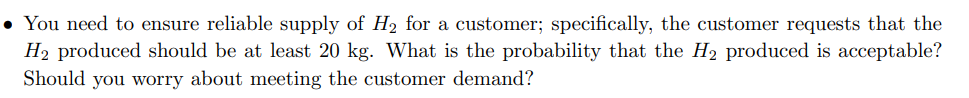

In [46]:
#now we need to calculate the probability that H2 production is larger than 20 kg
#put the code here
greater_than_20_prob = 1 - stats.norm.cdf(20, loc=exp_value, scale=std_dev)
print(f'{greater_than_20_prob = :.5f}')
#YES! I should be worried about meeting the customer's demands! We might miss 1/2 of the time!

greater_than_20_prob = 0.50067


## Problem 3: Coffee

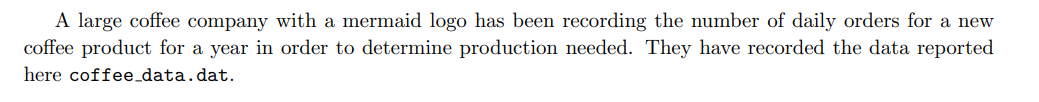

### load data

In [1]:
df = pd.read_csv('../Matlab/Data/coffee_data.dat', delimiter='\s+', header=None, names=['cash_flow'])
df

NameError: name 'pd' is not defined

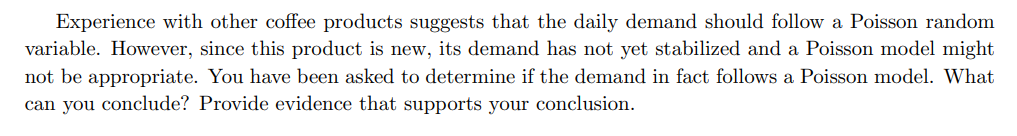